In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import koreanize_matplotlib

문제1. `Advertising.csv`를 불러와 `df`라는 이름의 DataFrame으로 저장하세요.

In [2]:
df = pd.read_csv("./data/15_Advertising.csv")

문제2. `df.head()`, `df.info()`, `df.describe()`를 이용해 데이터의 구조를 파악하세요.

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


각 컬럼의 타입은 어떠한가요? -> 물건은 다 float로 이루어져 있다. <br>
결측치는 보이나요? -> 결측치는 없는거 같다.

문제 3. `df.corr()`를 사용하여 변수 간 상관관계를 확인하고, 어떤 광고 채널이 `Sales`와 가장 강하게 연관돼 보이는지 적어보세요.

In [6]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<Axes: >

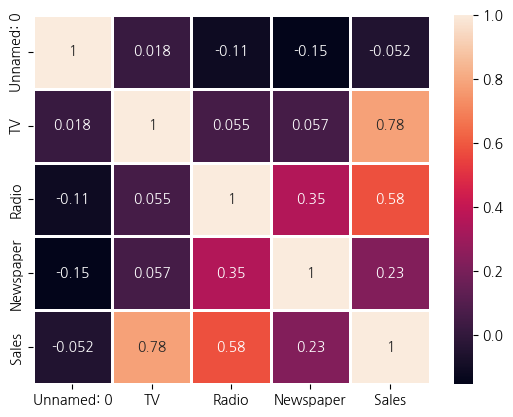

In [7]:
plt.figure()
sns.heatmap(df.corr(),annot=True,linewidths=1)

TV랑 가장 강하게 연관되어 있습니다.

## 2. 단순 선형회귀 (Simple Linear Regression)

우선 TV 광고비(`TV`) 하나만 가지고 Sales를 예측해 보겠습니다.

문제 4. 독립변수 X로 `df[['TV']]`, 종속변수 y로 `df['Sales']`를 준비하세요.
  - statsmodels를 사용할 것이므로, 상수항(절편)을 추가한 X를 `sm.add_constant()`로 생성하세요.

문제 5. `statsmodels.api`의 `OLS`를 사용해 단순 회귀모델을 적합(fit)하고, `summary()`를 출력하세요.
  - 회귀계수(coef), p-value, R-squared를 확인하세요.

문제 6. 산점도(가로축=TV, 세로축=Sales) 위에 회귀직선(예측치)을 그려 시각화하세요.
  - matplotlib나 seaborn을 사용해도 됩니다.
  - 회귀 직선이 데이터의 경향을 잘 설명하는 것처럼 보이나요?

In [8]:
X = df['TV']
y = df['Sales']

In [9]:
# 상수 추가 y절편 추가
X_with_const = sm.add_constant(X)

In [10]:
# 모델 훈련
model = sm.OLS(y, X_with_const).fit()
y_pred = model.predict(X_with_const)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           1.47e-42
Time:                        17:02:39   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

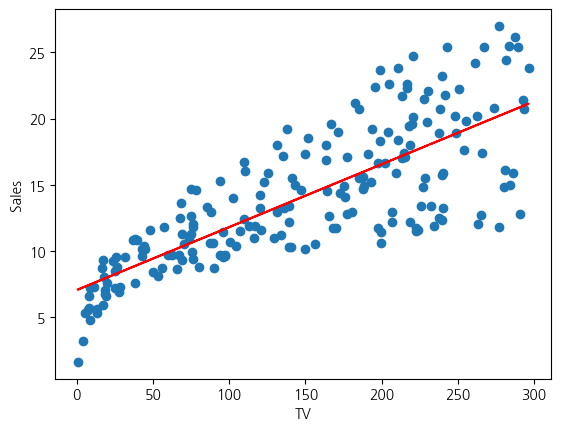

In [11]:
plt.figure()
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

전반적으로 회귀 직선이 데이터를 잘 설명하는 것처럼 보인다.

In [12]:
X = df.drop(['Unnamed: 0','Sales'],axis=1)
y = df['Sales']

* R-squared이 0.612에서 0.982로 상승했다.
* 상대적으로 Newspaper의 p-value가 높아서 덜 중요한 변수로 보인다.
* p 벨류가 다른 값은 0이지만 Newspaper만 0.013이기 때문이다.

## 4. Train/Test 분할과 성능 평가

실제 예측 모델은 데이터를 나눠서 성능을 평가해야 합니다.

문제 9. `train_test_split`을 이용하여 X, y를 학습용(train)과 테스트용(test)으로 나누세요.
  - `test_size=0.2`, `random_state=42`로 합니다.

문제 10. 학습 세트로 회귀모델을 적합한 다음, 테스트 세트에서 예측값을 구하고
  - 평균제곱오차(MSE: `mean_squared_error`)를 계산하세요.
  - 추가로 결정계수(R²)를 계산해보세요. (`sklearn.metrics.r2_score` 사용 가능)
  - 이 값들이 어떤 의미인지 주석으로 설명하세요.


문제 9. train_test_split을 이용하여 X, y를 학습용(train)과 테스트용(test)으로 나누세요.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

문제 10. 학습 세트로 회귀모델을 적합한 다음, 테스트 세트에서 예측값을 구하고

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(X_test)

In [17]:
# MSE(평균제곱오차)
mse = mean_squared_error(y_test, y_pred)

In [18]:
# 결정계수 R²
r2 = r2_score(y_test, y_pred)

In [19]:
print("MSE :", mse)
print("R² :", r2)

MSE : 3.174097353976104
R² : 0.899438024100912


## 5. 변수 선택과 해석

문제 11. 다중 회귀 결과에서 p-value가 상대적으로 큰 변수를 제거해 보고,
  - 남은 변수들로만 다시 모델을 적합한 뒤 summary()를 비교하세요.
  - R-squared, Adj. R-squared, 그리고 각 계수의 p-value를 비교하며 '더 낫다' vs '더 단순하다' 관점에서 어떤 모델을 선택할지 적으세요.

문제 12. 당신이 마케팅 팀이라고 가정하세요.
  - "어디에 광고비를 넣는 것이 가장 효과적으로 매출(Sales)을 올리는가?"
  - 위의 회귀계수(기울기)와 p-value를 근거로, 팀에 줄 전략적 메시지를 한 단락으로 작성하세요.

In [29]:
X2 = df.drop(['Unnamed: 0','TV','Sales'],axis=1)
y2 = df['Sales']

In [30]:
X2

,Radio,Newspaper
0,37.8,69.2
1,39.3,45.1
2,45.9,69.3
3,41.3,58.5
4,10.8,58.4
...,...,...
195,3.7,13.8
196,4.9,8.1
197,9.3,6.4
198,42.0,66.2


In [31]:
X2_with_const = sm.add_constant(X2)

In [32]:
model2 = sm.OLS(y2, X2_with_const).fit()
y2_pred = model2.predict(X2_with_const)

print(model.summary())
print("-"*60)
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           1.47e-42
Time:                        17:08:34   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

R-squared, Adj. R-squared, 그리고 각 계수의 p-value를 비교하며 '더 낫다' vs '더 단순하다' 관점에서 어떤 모델을 선택할지 적으세요.
- 저라면 첫번째 것을 고르 겠습니다. 왜냐면 R-squared,p-value모두 첫번째 것이 좋기때문에 첫번쨰 것을 고르겠습니다.

문제 12. 당신이 마케팅 팀이라고 가정하세요.
  - "어디에 광고비를 넣는 것이 가장 효과적으로 매출(Sales)을 올리는가?"
  - 위의 회귀계수(기울기)와 p-value를 근거로, 팀에 줄 전략적 메시지를 한 단락으로 작성하세요.

TV에 광고비를 넣는것이 가장 효과적으로 메출을 올립니다.
